In [21]:
!pip install mplfinance

In [22]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

df = yf.Ticker("BBCA.JK")
df = df.history(period="max")
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-08 00:00:00+07:00,10200.0,10500.0,10150.0,10400.0,99622900,0.0,0.0
2024-10-09 00:00:00+07:00,10400.0,10525.0,10400.0,10425.0,56835200,0.0,0.0
2024-10-10 00:00:00+07:00,10425.0,10500.0,10400.0,10500.0,51080000,0.0,0.0
2024-10-11 00:00:00+07:00,10575.0,10575.0,10375.0,10375.0,44632100,0.0,0.0
2024-10-14 00:00:00+07:00,10375.0,10500.0,10375.0,10500.0,31738600,0.0,0.0


In [23]:
del df["Dividends"]
del df["Stock Splits"]

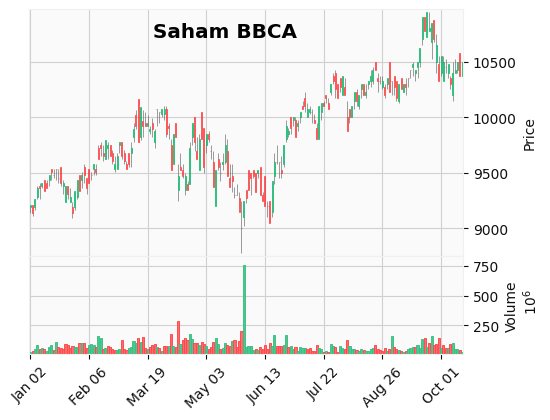

In [24]:
dfVisual = df.loc["2024-01-01":].copy()

mpf.plot(dfVisual, type='candle', style='yahoo', title='Saham BBCA',
         ylabel='Price', ylabel_lower='Volume', figsize=(5,4),
         volume=True, tight_layout=True)

mpf.show
plt.show()

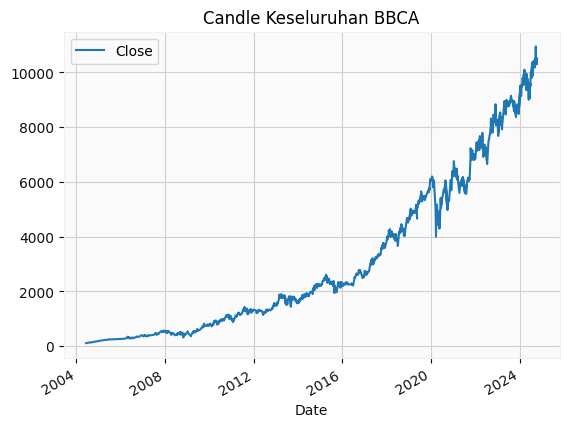

In [25]:
df.plot.line(y="Close", use_index=True)
plt.title("Candle Keseluruhan BBCA")
plt.show()

In [26]:
df = df.loc["2020-01-01":].copy()

In [27]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Memuat data
prices = df['Close'].values.reshape(-1, 1)

In [28]:
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Split the dataset
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]



In [29]:
def create_dataset(data, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback):
      X.append(data[i:i+lookback])
      Y.append(data[i+lookback])
    return np.array(X), np.array(Y)

lookback = 10 # temporary
train_X, train_Y = create_dataset(train_data, lookback)
test_X, test_Y = create_dataset(test_data, lookback)


In [30]:
# Make model RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=32, input_shape=(lookback, 1)),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# train model
model.fit(train_X, train_Y, epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0917
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6494e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1948e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3088e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4864e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4801e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1070e-04
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2595e-04
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9391e-04
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.673

In [31]:
#Prediction
train_preds = model.predict(train_X)
test_preds = model.predict(test_X)

# Normalize the data
train_preds = scaler.inverse_transform(train_preds)
train_Y = scaler.inverse_transform(train_Y)
test_preds = scaler.inverse_transform(test_preds)
test_Y = scaler.inverse_transform(test_Y)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [32]:
# Menghitung metrik evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_Y, test_preds)
mae = mean_absolute_error(test_Y, test_preds)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 29802.237365026733
Mean Absolute Error (MAE): 141.43816863738738


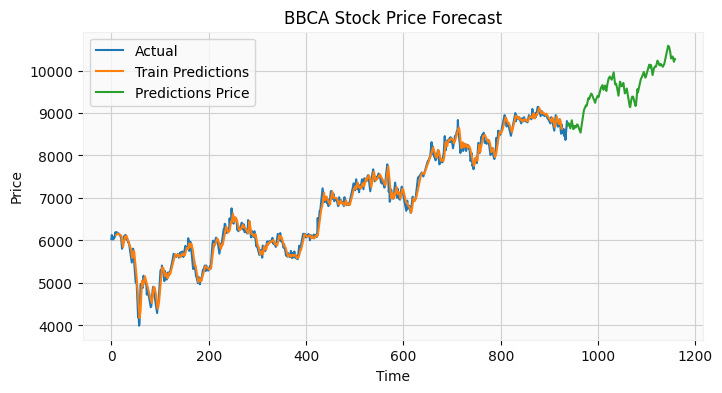

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(prices[:train_size + lookback], label='Actual')
plt.plot(range(lookback, train_size), train_preds, label='Train Predictions')
plt.plot(range(train_size + lookback, len(prices)), test_preds, label='Predictions Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("BBCA Stock Price Forecast")
plt.legend()
plt.show()

In [34]:
# take some period to Test Predictions and Actual
test_actual = prices[train_size + lookback:]

# Make DataFrame fro comparison
comparison_df = pd.DataFrame({'Harga Sebenarnya': test_actual.flatten(),
                              'Harga Prediksi': test_preds.flatten()})

comparison_df

,Harga Sebenarnya,Harga Prediksi
0,8731.181641,8700.701172
1,8755.502930,8749.361328
2,8755.502930,8763.185547
3,8585.256836,8750.714844
4,8633.898438,8686.441406
...,...,...
217,10400.000000,10224.918945
218,10425.000000,10247.627930
219,10500.000000,10205.487305
220,10375.000000,10279.001953


In [35]:
df2 = yf.Ticker("BBRI.JK")
df2 = df2_history = df2.history(period="max")
df2.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-08 00:00:00+07:00,4800.0,5050.0,4760.0,5000.0,527474400,0.0,0.0
2024-10-09 00:00:00+07:00,5000.0,5075.0,4930.0,4930.0,309336600,0.0,0.0
2024-10-10 00:00:00+07:00,4920.0,4970.0,4860.0,4860.0,226564700,0.0,0.0
2024-10-11 00:00:00+07:00,4910.0,4940.0,4890.0,4900.0,104875300,0.0,0.0
2024-10-14 00:00:00+07:00,4900.0,4930.0,4870.0,4900.0,125414400,0.0,0.0


In [36]:
del df2["Dividends"]
del df2["Stock Splits"]

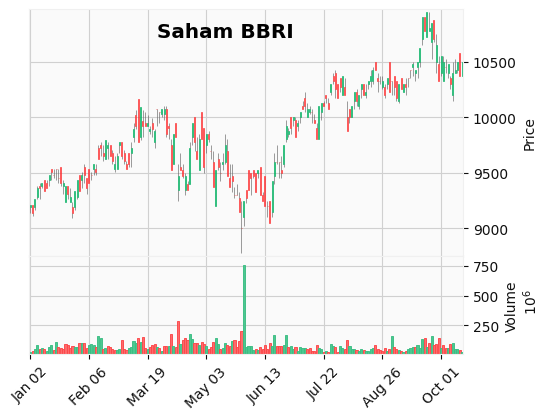

In [38]:
dfVisual = df.loc["2024-01-01":].copy()

mpf.plot(dfVisual, type='candle', style='yahoo', title='Saham BBRI',
         ylabel='Price', ylabel_lower='Volume', figsize=(5,4),
         volume=True, tight_layout=True)

mpf.show
plt.show()

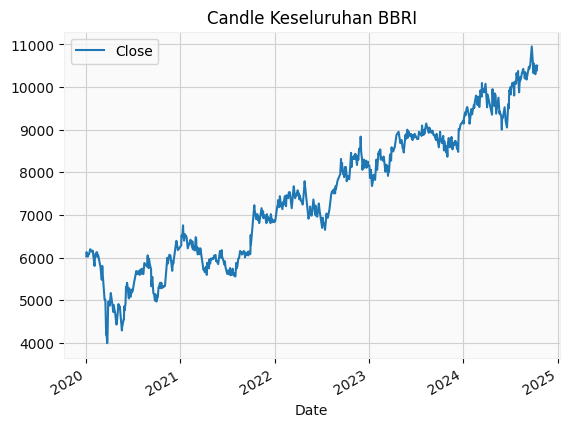

In [39]:
df.plot.line(y="Close", use_index=True)
plt.title("Candle Keseluruhan BBRI")
plt.show()

In [41]:
df2 = df.loc["2020-01-01":].copy()

In [42]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load Data
prices = df['Close'].values.reshape(-1, 1)


In [43]:
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Split the dataset
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]



In [44]:
def create_dataset(data, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback):
      X.append(data[i:i+lookback])
      Y.append(data[i+lookback])
    return np.array(X), np.array(Y)

lookback = 10 # temporary
train_X, train_Y = create_dataset(train_data, lookback)
test_X, test_Y = create_dataset(test_data, lookback)

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=32, input_shape=(lookback, 1)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# train model
model.fit(train_X, train_Y, epochs=50, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1848
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.9936e-04
Epoch 16/50
29/29 ━━━━━━━━

In [46]:
#prediction
train_preds = model.predict(train_X)
test_preds = model.predict(test_X)

# Normalize data
train_preds = scaler.inverse_transform(train_preds)
train_Y = scaler.inverse_transform(train_Y)
test_preds = scaler.inverse_transform(test_preds)
test_Y = scaler.inverse_transform(test_Y)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_Y, test_preds)
mae = mean_absolute_error(test_Y, test_preds)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 31852.580641054894
Mean Absolute Error (MAE): 140.79557731559686


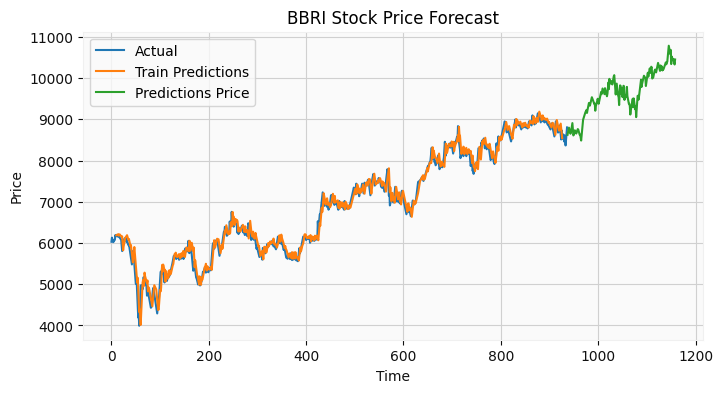

In [49]:
plt.figure(figsize=(8, 4))
plt.plot(prices[:train_size + lookback], label='Actual')
plt.plot(range(lookback, train_size), train_preds, label='Train Predictions')
plt.plot(range(train_size + lookback, len(prices)), test_preds, label='Predictions Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("BBRI Stock Price Forecast")
plt.legend()
plt.show()


In [50]:
test_actual = prices[train_size + lookback:]
comparison_df = pd.DataFrame({'Harga Sebenarnya': test_actual.flatten(),
                              'Harga Prediksi': test_preds.flatten()})

comparison_df


,Harga Sebenarnya,Harga Prediksi
0,8731.181641,8623.680664
1,8755.502930,8771.230469
2,8755.502930,8737.355469
3,8585.256836,8797.941406
4,8633.898438,8764.293945
...,...,...
217,10400.000000,10470.834961
218,10425.000000,10353.469727
219,10500.000000,10334.061523
220,10375.000000,10330.429688
